# Convolution Neural Networks on the MNIST dataset

## Import the libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models  import  Sequential
from keras.datasets  import  mnist 
from keras.utils import  to_categorical 
import  matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


###loading the data 

In [2]:
(X_train, y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## Pre-processing
Our MNIST images only have a depth of 1, but we must explicitly declare that

In [4]:
classes =10 
epochs= 3

X_train =X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255.0
X_test /= 255.0
y_train = to_categorical(y_train,classes)
y_test = to_categorical(y_test,classes)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


## Create, compile and train the model.
![CNN model](images/cnn-model.jpg)

- The first parameter is the number of filters

In [6]:
cnn=Sequential()
cnn.add(Conv2D(32,kernel_size=(5,5),input_shape=(28,28,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())#give ip to a fully  conected network
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [7]:
history_cnn = cnn.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.0966 - accuracy: 0.9691 - val_loss: 0.0315 - val_accuracy: 0.9907
Epoch 2/5
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.0209 - val_accuracy: 0.9937
Epoch 3/5
60000/60000 [==============================] - 295s 5ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0183 - val_accuracy: 0.9945
Epoch 4/5
60000/60000 [==============================] - 312s 5ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0083 - val_accuracy: 0.9975
Epoch 5/5
60000/60000 [==============================] - 314s 5ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0161 - val_accuracy: 0.9947


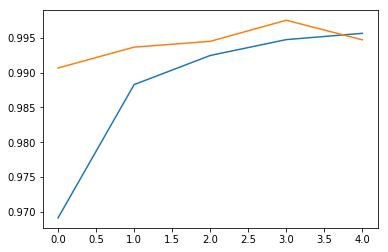

In [13]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

## The accuracy of the model

In [15]:
print(history_cnn.history['val_accuracy'])

[0.9906666874885559, 0.9936666488647461, 0.9944999814033508, 0.9975333213806152, 0.9947166442871094]
